In [ ]:
def cpp(n,[a,b],[c,d]):
    '''Takes n number of points as a list (tuple?) and returns pair of points with the smallest distance between them.'''
    #See if can do this in terms of *args and *kwargs

please enter number of random points: 
7
please enter the number (e.g. 2,3,4,...) of dimensions (2D or 3D will plot): 
3
L2-norm distance 0.28283631091419265
pt1 coords [0.16279025 0.82587468 0.03289649]
pt2 coords [0.44281983 0.86535242 0.02827895]


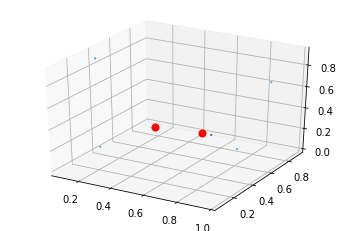

SystemExit: 

In [8]:
'''
Given an input array finds the closest pair.  Achieves matching using scipy's cKDTree, very quick even for 
millions of points.  Speed ups may be achieved using pyflann: 
https://github.com/mariusmuja/flann/tree/master/src/python/pyflann  
User must input number of points to generate and the number of dimensions to use.  For 2D and 3D
plots are generated. 
'''
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.spatial as spatial 
from mpl_toolkits.mplot3d import Axes3D

def show_2d(r_pts, closest):
    if closest == None:
        plt.plot(r_pts[:,1],r_pts[:,0],'b.')
        plt.show()
    else:
        plt.plot(r_pts[:,1],r_pts[:,0],'b.')
        #recolour closest points
        plt.plot([r_pts[closest[0],1],r_pts[closest[1],1]],
                 [r_pts[closest[0],0],r_pts[closest[1],0]],
                 'ro')
        plt.show()
    plt.close()
    
def show_3d(r_pts, closest):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    if closest == None:     
        ax.scatter(r_pts[:,0], r_pts[:,1], r_pts[:,2], s=5, marker='.') #x,y,z
        plt.show()
    else:
        ax.scatter(r_pts[:,0], r_pts[:,1], r_pts[:,2], s=5, marker='.') #x,y,z
        ax.scatter(r_pts[closest[0],0], r_pts[closest[0],1], r_pts[closest[0],2], s=50, c='r')
        ax.scatter(r_pts[closest[1],0], r_pts[closest[1],1], r_pts[closest[1],2], s=50, c='r')
        plt.show()
    plt.close()
        
          
def get_closest_pair(r_pts):
    
    #make kdtree and self compare
    tree = spatial.cKDTree(r_pts)

    #compute the distances (take the 2 closest as the
    #first distance is a self-comparison.
    distances, indexes = tree.query(r_pts, 2)
    
    #find minimum non self-reference distance
    mindist_pos = np.argmin(distances[:,1])
    print('L2-norm distance', distances[mindist_pos,1])
    print('pt1 coords', r_pts[mindist_pos])
    print('pt2 coords', r_pts[indexes[mindist_pos,1]])
    
    #return the two indexes associated with the minimum distance
    return mindist_pos, indexes[mindist_pos,1] 

def main():
    
    #get grid size
    print('please enter number of random points: ')
    n_points = int(input())
    print('please enter the number (e.g. 2,3,4,...) of dimensions (2D or 3D will plot): ')
    dims = int(input())
    
    #make random x and y values
    random_points = np.random.rand(n_points,dims)
        
    #find the closest point pair
    closest_index = get_closest_pair(random_points)
    
    #replot
    if dims == 2:
        show_2d(random_points, closest_index)
    if dims == 3:
        show_3d(random_points, closest_index)
    
if __name__ == '__main__':
    sys.exit(main())

In [4]:
import math
import random
import numpy


def eulicd(pt0, pt1):
    return math.sqrt(sum(map(lambda x, y: (x - y) ** 2, pt0, pt1)))


def oneNorm(pt0, pt1):
    return sum(map(lambda x, y: abs(x - y), pt0, pt1))


def infNorm(pt0, pt1):
    return max(map(lambda x, y: abs(x - y), pt0, pt1))


def pNorm(pt0, pt1):
    return (sum(map(lambda x, y: (x - y) ** p, pt0, pt1))) ** (1. / p)


def distance(pt0, pt1):
    return infNorm(pt0, pt1)


def BruceForceCloestPair(ptlst):
    mindist = distance(ptlst[0], ptlst[1])
    pair = (ptlst[0], ptlst[1])
    for i in xrange(len(ptlst)):
        for j in xrange(i + 1, len(ptlst)):
            dist = distance(ptlst[i], ptlst[j])
            if dist < mindist:
                mindist = dist
                pair = (ptlst[i], ptlst[j])
    return mindist, pair


def medianDivide(xsort, ysort):
    l = len(xsort)
    median = xsort[l / 2][0]
    leftx = xsort[0:l / 2]
    rightx = xsort[l / 2:]
    lefty = []
    righty = []
    for i in ysort:
        if i[0] < median:
            lefty.append(i)
        else:
            righty.append(i)
    return median, leftx, lefty, rightx, righty


def DivideConquer(xsort, ysort):
    if len(xsort) <= 3:
        return BruceForceCloestPair(xsort)
    median, leftx, lefty, rightx, righty = medianDivide(xsort, ysort)
    min0, pair0 = DivideConquer(leftx, lefty)
    min1, pair1 = DivideConquer(rightx, righty)
    (m, pair) = (min0, pair0) if min0 < min1 else (min1, pair1)
    leftj, rightj = median - m, median + m
    yy = []
    for pt in ysort:
        if leftj < pt[0] < rightj:
            yy.append(pt)
    l = len(yy)
    for i in range(l):
        for j in range(i + 1, min(l, i + 8)):
            dist = distance(yy[i], yy[j])
            if dist < m:
                m, pair = dist, (yy[i], yy[j])
    return m, pair


def ClosetPair(ptlst):
    from copy import deepcopy
    xsort = deepcopy(ptlst)
    xsort = sorted(xsort, key=lambda pt: pt[0])
    ysort = deepcopy(ptlst)
    ysort = sorted(ysort, key=lambda pt: pt[1])
    return DivideConquer(xsort, ysort)


# test code
def genRandomMatrix(m, n):
    return [[random.random() for j in xrange(n)] for i in xrange(m)]

if __name__ == "__main__":
    ptlst = genRandomMatrix(60, 3)
    ret0 = ClosetPair(ptlst)
    ret1 = BruceForceCloestPair(ptlst)
    if ret0[0] > ret1[0]:
        print("wrong")
    else:
        print("right")

NameError: name 'xrange' is not defined

SystemExit: 